In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Introduction
## Wage Data

In [2]:
df_wage = pd.read_csv("datasets/wage.csv")

In [3]:
df_wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


[Text(0, 0, '1. < HS Grad'),
 Text(0, 0, '2. HS Grad'),
 Text(0, 0, '3. Some College'),
 Text(0, 0, '4. College Grad'),
 Text(0, 0, '5. Advanced Degree')]

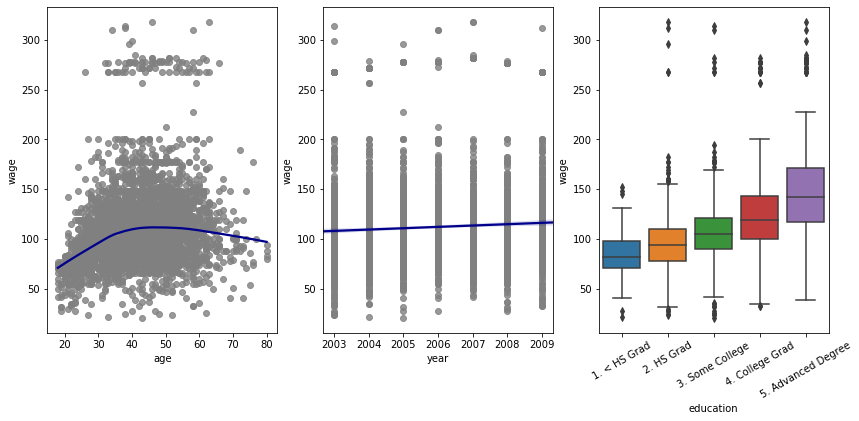

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
sns.regplot(x="age", y="wage", data=df_wage, ax=ax[0], scatter_kws={"color": "grey"}, line_kws={"color":"darkblue"}, lowess=True)
sns.regplot(x="year", y="wage", data=df_wage, ax=ax[1], scatter_kws={"color": "grey"}, line_kws={"color":"darkblue"})
bp = sns.boxplot(x="education", y="wage", data=df_wage, ax=ax[2], order=["1. < HS Grad", "2. HS Grad", "3. Some College", "4. College Grad", "5. Advanced Degree"])
bp.set_xticklabels(bp.get_xticklabels(), rotation=30)

**Figure 1.1** Wage data, which contains income survey information for males
from the central Atlantic region of the United States. Left: wage as a function of
age. On average, wage increases with age until about 60 years of age, at which
point it begins to decline. Center: wage as a function of year. There is a slow
but steady increase of approximately $10,000 in the average wage between 2003
and 2009. Right: Boxplots displaying wage as a function of education, with 1
indicating the lowest level (no high school diploma) and 5 the highest level (an
advanced graduate degree). On average, wage increases with the level of education.

## Stock Market Data

In [5]:
df_stock = pd.read_csv("datasets/smarket.csv")

In [6]:
df_stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


[Text(0, 0.5, 'Percentage change in S&P'),
 Text(0.5, 0, "Today's Direction"),
 Text(0.5, 1.0, 'Three Days Previous')]

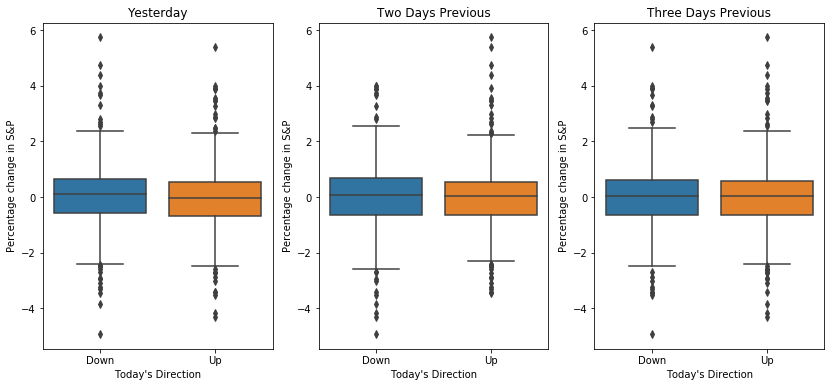

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
l1 = sns.boxplot(x="Direction", y="Lag1", data=df_stock, order=["Down","Up"], ax=ax[0])
l2 = sns.boxplot(x="Direction", y="Lag2", data=df_stock, order=["Down","Up"], ax=ax[1])
l3 = sns.boxplot(x="Direction", y="Lag3", data=df_stock, order=["Down","Up"], ax=ax[2])
l1.set(ylabel="Percentage change in S&P", xlabel="Today's Direction", title="Yesterday")
l2.set(ylabel="Percentage change in S&P", xlabel="Today's Direction", title="Two Days Previous")
l3.set(ylabel="Percentage change in S&P", xlabel="Today's Direction", title="Three Days Previous")

**Figure 1.2** Left: Boxplots of the previous day’s percentage change in the S&P
index for the days for which the market increased or decreased, obtained from the
Smarket data. Center and Right: Same as left panel, but the percentage changes
for 2 and 3 days previous are shown.

# 2. Statistical Learning
## What Is Statistical Learning?

In [8]:
df_advertising = pd.read_csv("datasets/Advertising.csv")
df_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


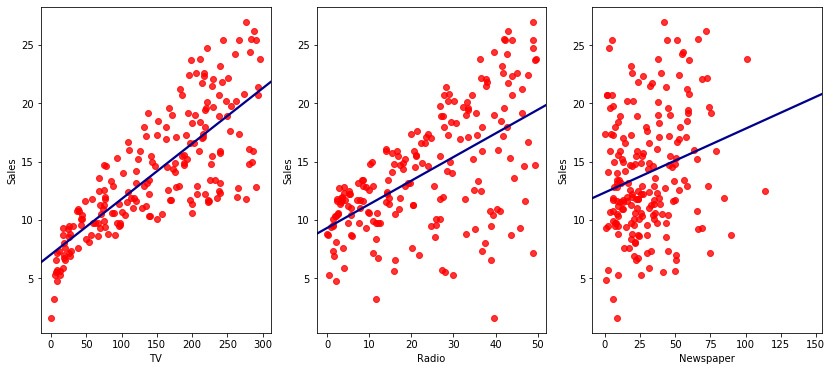

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
for i in range(0,3):
    sns.regplot(x=df_advertising.columns[i], y="Sales", data=df_advertising, ax=ax[i], scatter_kws={"color": "red"}, line_kws={"color":"darkblue"}, ci=None)

**Figure 2.1** The Advertising data set. The plot displays sales, in thousands
of units, as a function of TV, radio, and newspaper budgets, in thousands of
dollars, for 200 different markets. In each plot we show the simple least squares
fit of sales to that variable, as described in Chapter 3. In other words, each blue
line represents a simple model that can be used to predict sales using TV, radio,
and newspaper, respectively.

## 2.4 Exercises
### Problem 8
#### A

In [10]:
df_college = pd.read_csv('datasets/college.csv')

#### B

In [11]:
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [12]:
df_college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

#### C

In [13]:
# i.
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


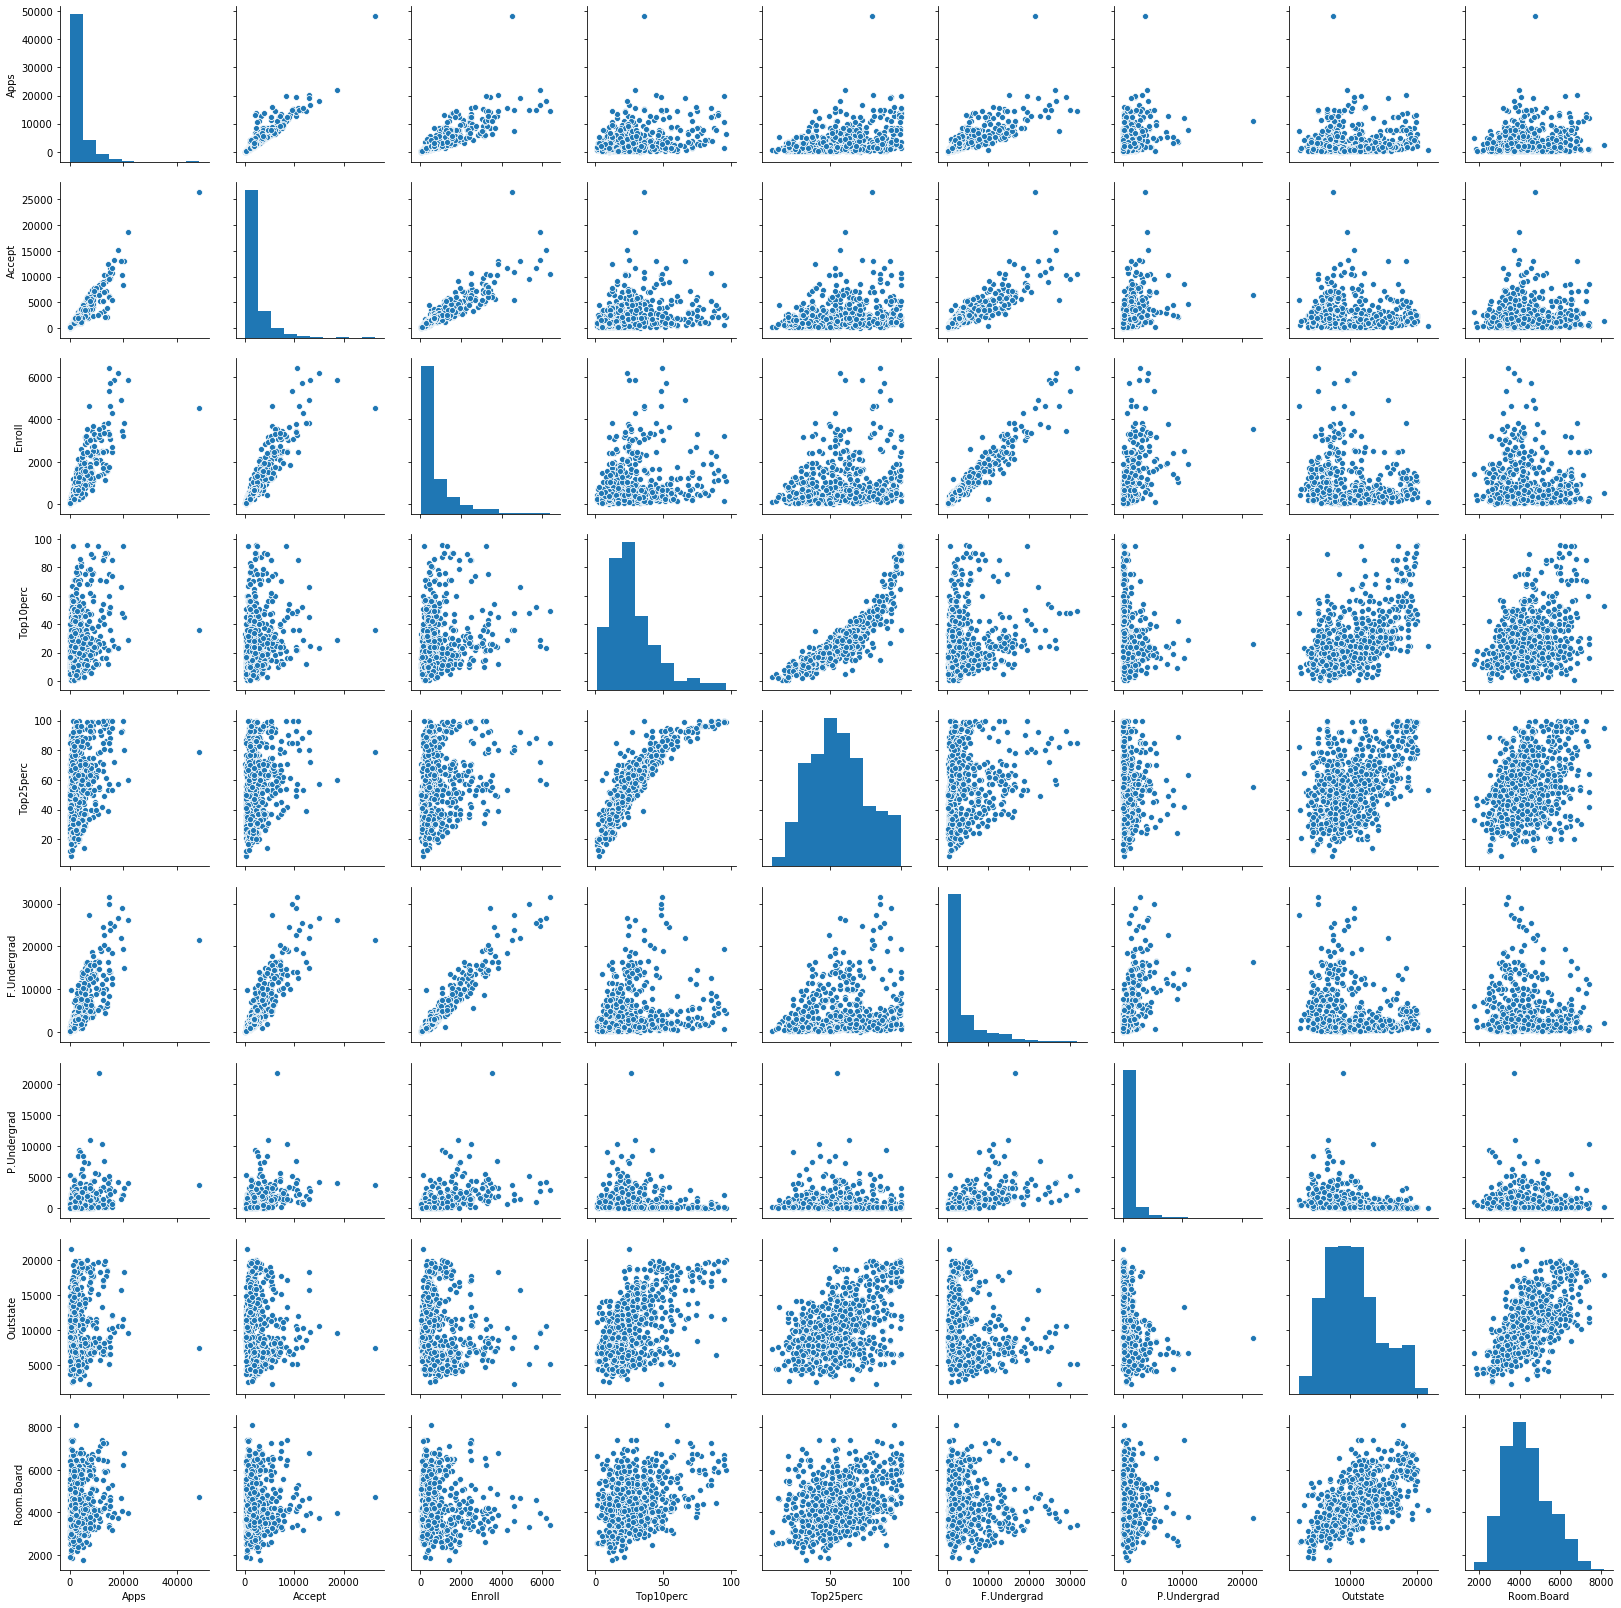

In [14]:
# ii.
sns.pairplot(df_college.iloc[:, :10])

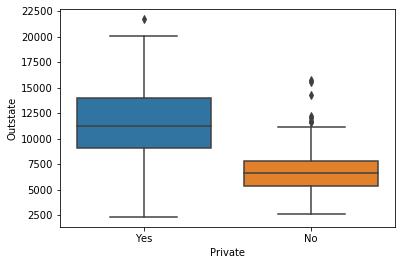

In [15]:
# iii.
sns.boxplot(x="Private", y="Outstate", data=df_college)

In [16]:
# iv.
bins = [0, 50, 100]
labels =["No","Yes"]
df_college['Elite'] = pd.cut(df_college['Top10perc'], bins, labels=labels)

In [17]:
df_college.head()[["Top10perc","Elite"]]

,Top10perc,Elite
Abilene Christian University,23,No
Adelphi University,16,No
Adrian College,22,No
Agnes Scott College,60,Yes
Alaska Pacific University,16,No


In [18]:
df_college.Elite.value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

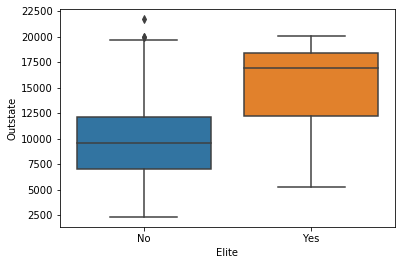

In [19]:
sns.boxplot("Elite", "Outstate", data=df_college)

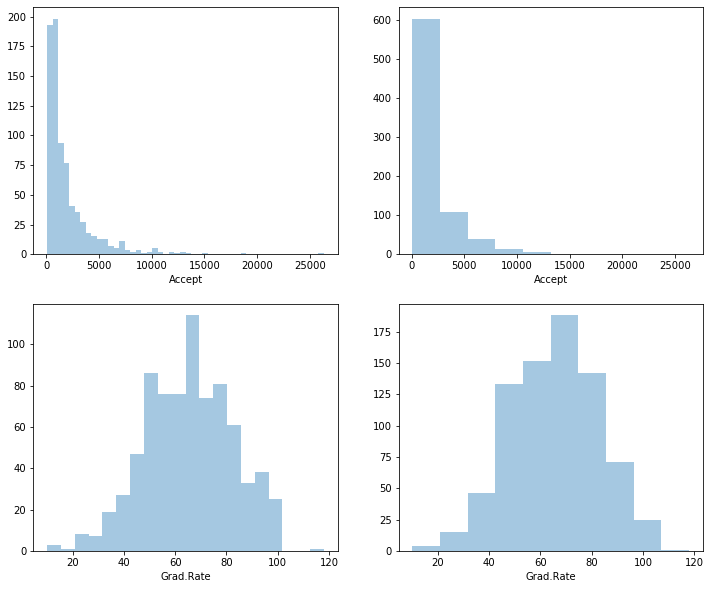

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
sns.distplot(df_college.Accept, kde=False, ax=ax[0, 0])
sns.distplot(df_college.Accept, bins=10, kde=False, ax=ax[0, 1])
sns.distplot(df_college["Grad.Rate"], kde=False, ax=ax[1, 0])
sns.distplot(df_college["Grad.Rate"], bins=10, kde=False, ax=ax[1, 1])

### Problem 9
#### A

In [21]:
df_auto = pd.read_csv('datasets/auto.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
df_auto.info()
quantitative = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]
qualitative = ["year", "origin", "name"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


#### B

In [23]:
df_auto.describe().loc[["min","max"], quantitative]

,mpg,cylinders,displacement,horsepower,weight,acceleration
min,9.0,3.0,68.0,46.0,1613.0,8.0
max,46.6,8.0,455.0,230.0,5140.0,24.8


#### C

In [24]:
df_auto.describe().loc[["mean","std"], quantitative]

,mpg,cylinders,displacement,horsepower,weight,acceleration
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864


#### D

In [25]:
pd.concat((df_auto.iloc[:10], df_auto.iloc[85:])).describe().loc[["min","max","mean","std"], quantitative]

,mpg,cylinders,displacement,horsepower,weight,acceleration
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913


#### E, F

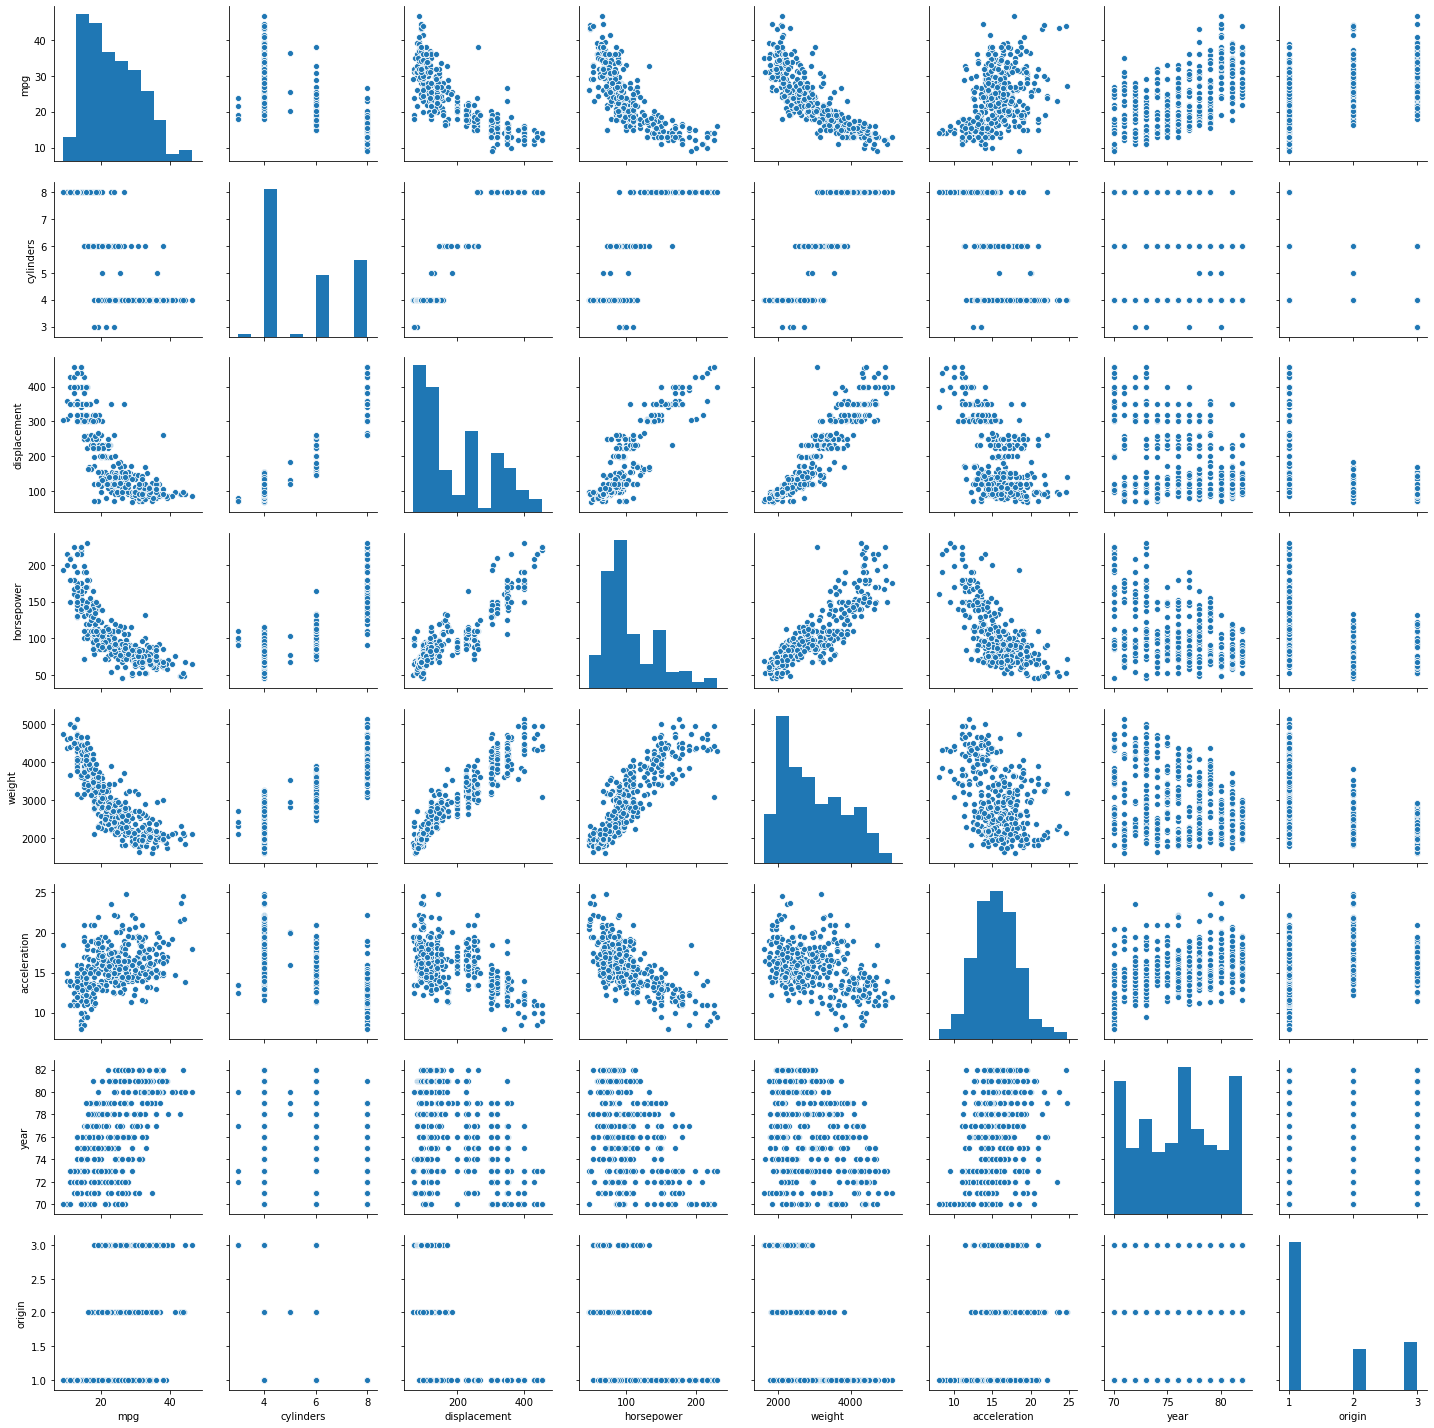

In [26]:
sns.pairplot(df_auto)

In [27]:
df_auto.corr()["mpg"].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
year            0.580541
mpg             1.000000
Name: mpg, dtype: float64

We can see mpg is negatively affected by weight, displacement, horsepower and cylinders.

# 3. Linear Regression
## 3.1 Simple Linear Regression

In [28]:
df_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
# We need to get the regression in order to calculate the errors
# We are going to use the LinearRegression of skLearn
tv_lr = LinearRegression()
tv_lr.fit(df_advertising.TV.values.reshape(-1, 1), df_advertising.Sales)
tv_reg = tv_lr.predict(df_advertising.TV.values.reshape(-1, 1))

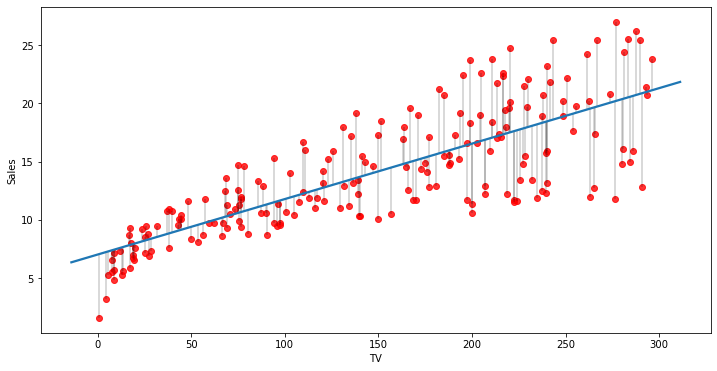

In [30]:
plt.figure(figsize=(12, 6))
sns.regplot('TV', 'Sales', data=df_advertising, ci=None, scatter_kws={"color":"red"}) # Regression
plt.vlines(df_advertising.TV, tv_reg, df_advertising.Sales, lw = 0.3) # Error bars

**Figure 3.1** For the Advertising data, the least squares fit for the regression
of sales onto TV is shown. The fit is found by minimizing the sum of squared
errors. Each grey line segment represents an error, and the fit makes a compromise
by averaging their squares. In this case a linear fit captures the essence of
the relationship, although it is somewhat deficient in the left of the plot.

In [31]:
print(f"Coefficient: {tv_lr.coef_[0]}")
print(f"Interception: {tv_lr.intercept_}")

Coefficient: 0.047536640433019764
Interception: 7.032593549127693


## 3.3 Other Considerations in the Regression Model
### 3.3.1 Qualitative Predictors

In [32]:
df_Credit = pd.read_csv('datasets/Credit.csv')
df_Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


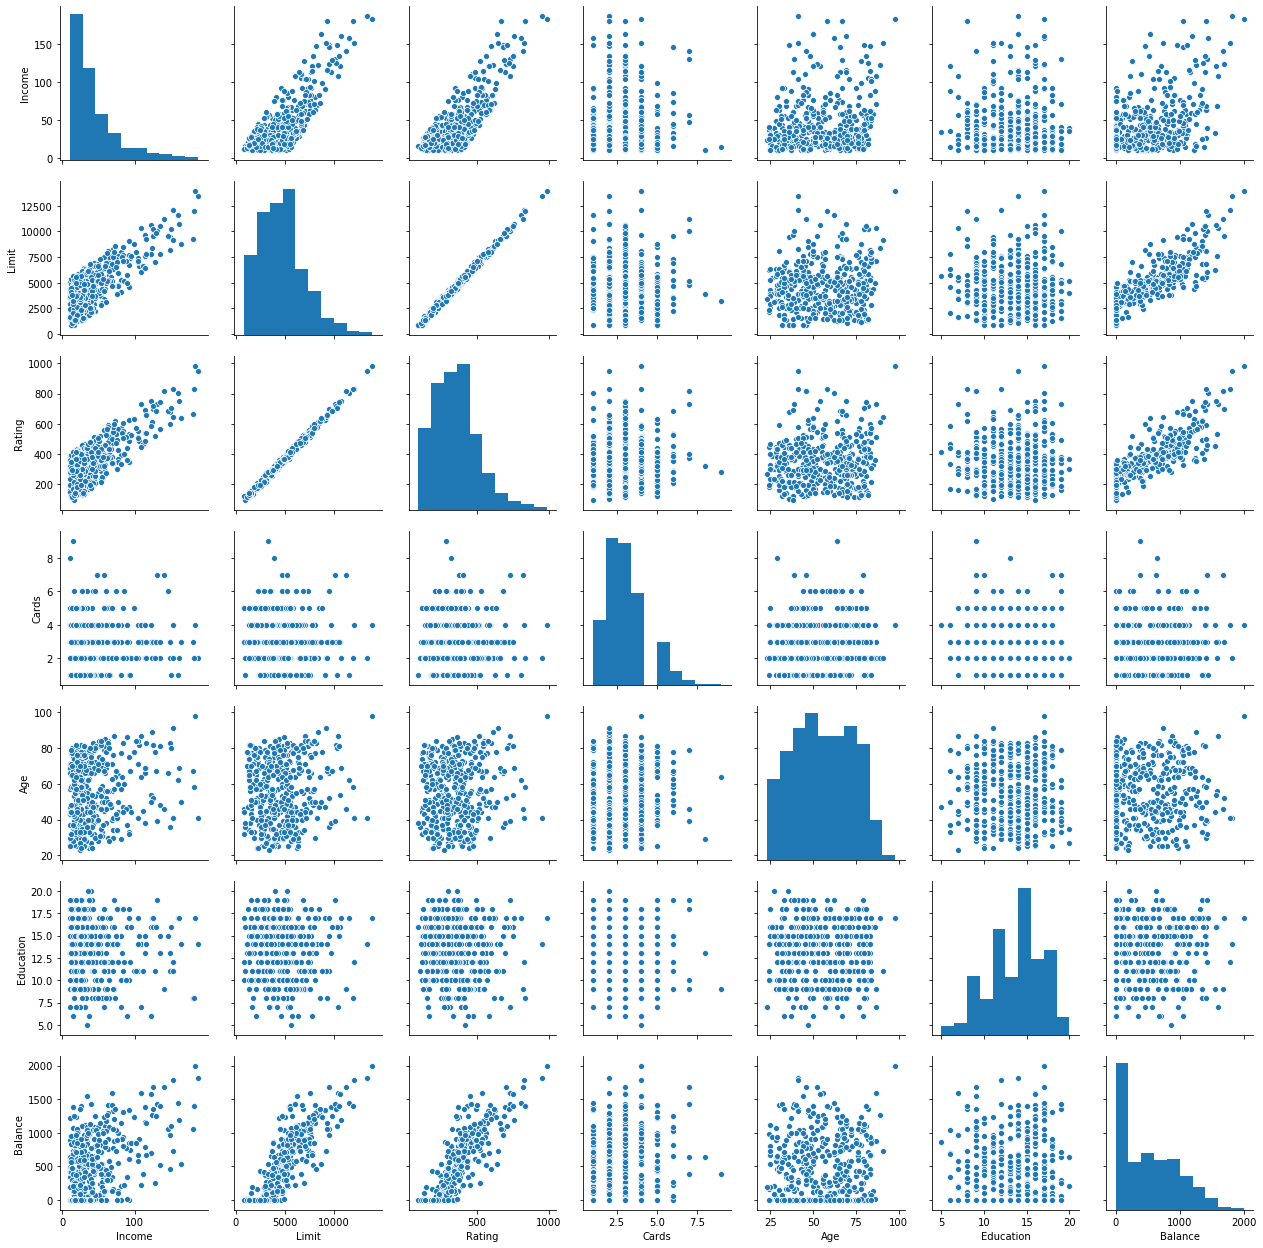

In [33]:
sns.pairplot(df_Credit)

**Figure 3.6** The Credit data set contains information about balance, age,
cards, education, income, limit, and rating for a number of potential customers.

### 3.3.2 Extensions of the Linear Model

In [34]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(8, 50)

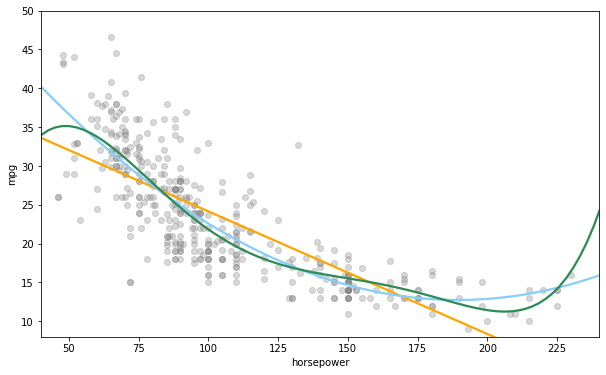

In [35]:
plt.figure(figsize=(10, 6))
sns.regplot(x="horsepower", y="mpg", data=df_auto, ci=None, scatter_kws={"color":"grey", "alpha":0.3}, line_kws={"color":"orange"})
sns.regplot(x="horsepower", y="mpg", data=df_auto, ci=None, order = 2, scatter = False, line_kws={"color":"lightskyblue"})
sns.regplot(x="horsepower", y="mpg", data=df_auto, ci=None, order = 5, scatter = False, line_kws={"color":"seagreen"})
plt.xlim(40, 240)
plt.ylim(8, 50)

**Figure 3.8** The Credit data set contains information about balance, age,
cards, education, income, limit, and rating for a number of potential customers.

### 3.3.3 Potential Problems
#### 1. Non-linearity of the Data

In [36]:
auto_lr = LinearRegression()
auto_lr.fit(df_auto.horsepower.values.reshape(-1, 1), df_auto.mpg)
auto_lr_pred = auto_lr.predict(df_auto.horsepower.values.reshape(-1, 1))

In [37]:
auto_quadratic = make_pipeline(PolynomialFeatures(2), LinearRegression())
auto_quadratic.fit(df_auto.horsepower.values.reshape(-1, 1), df_auto.mpg)
auto_quad_pred = auto_quadratic.predict(df_auto.horsepower.values.reshape(-1, 1))

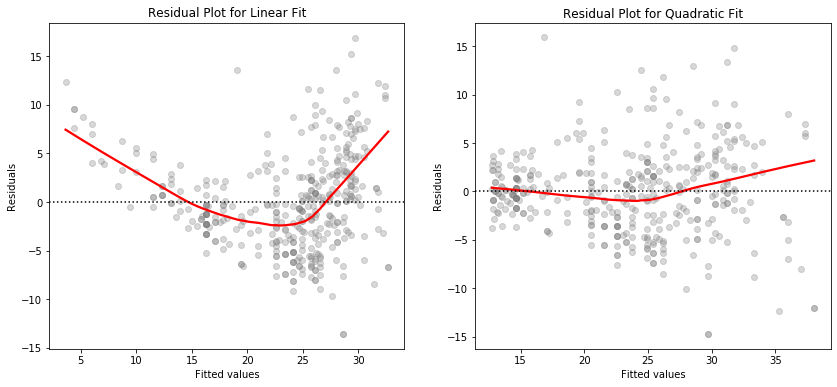

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
g1 = sns.regplot(auto_lr_pred, df_auto.mpg-auto_lr_pred, ax=ax[0], lowess=True, scatter_kws={"color":"grey", "alpha":0.3}, line_kws={"color":"red"})
g2 = sns.regplot(auto_quad_pred, df_auto.mpg-auto_quad_pred, ax=ax[1], lowess=True, scatter_kws={"color":"grey", "alpha":0.3}, line_kws={"color":"red"})
g1.set(ylabel="Residuals", xlabel="Fitted values", title="Residual Plot for Linear Fit")
g2.set(ylabel="Residuals", xlabel="Fitted values", title="Residual Plot for Quadratic Fit")
g1.axhline(0, color="black", linestyle=":")
g2.axhline(0, color="black", linestyle=":")

**FIGURE 3.9.** Plots of residuals versus predicted (or fitted) values for the Auto
data set. In each plot, the red line is a smooth fit to the residuals, intended to make
it easier to identify a trend. Left: A linear regression of mpg on horsepower. A
strong pattern in the residuals indicates non-linearity in the data. Right: A linear
regression of mpg on horsepower and horsepower2. There is little pattern in the
residuals.

#### 6. Collinearity

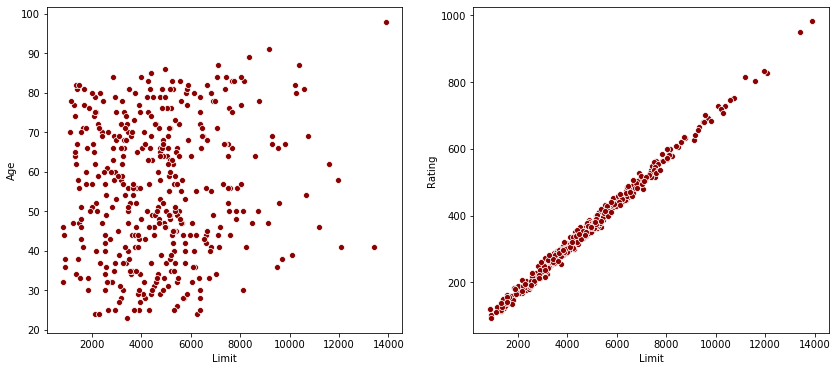

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot("Limit","Age",data=df_Credit, ax=ax[0], color="darkred")
sns.scatterplot("Limit","Rating", data=df_Credit, ax=ax[1], color="darkred")

**FIGURE 3.14.** Scatterplots of the observations from the Credit data set. Left:
A plot of age versus limit. These two variables are not collinear. Right: A plot
of rating versus limit. There is high collinearity.

## 3.7 Exercises

#### 8.

In [40]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [41]:
# a) 
mpg_horsepower = smf.ols('mpg ~ horsepower', data=df_auto).fit()
mpg_horsepower.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           7.03e-81
Time:                        14:28:11   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Yes, the F-statistic is larger than 1 and the p-value is close to zero we can reject the null hypothesis and state there is a statistically significant relationship between horsepower and mpg.<br>
ii. Since the R2 is about 0.606, the horsepower explains 60.6% of the variance in mpg.<br>
iii. Negative, we can see a coefficient of -0.1578.

In [42]:
# iv)
mpg_horsepower.params['Intercept'] + mpg_horsepower.params['horsepower'] * 98

24.467077152512434

In [43]:
result = mpg_horsepower.get_prediction(pd.DataFrame({'horsepower': [98]}))
result.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


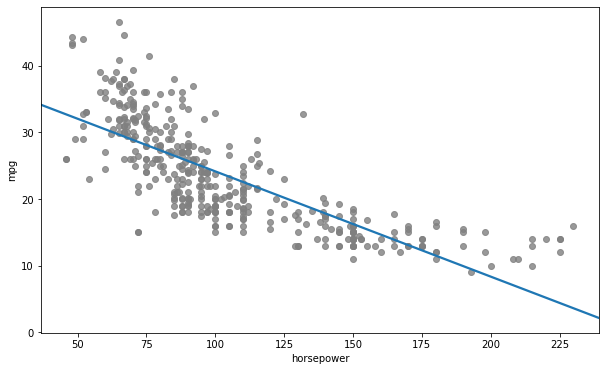

In [60]:
# b)
plt.figure(figsize=(10, 6))
sns.regplot("horsepower","mpg",data=df_auto, ci=None, scatter_kws = {"color":"grey"})

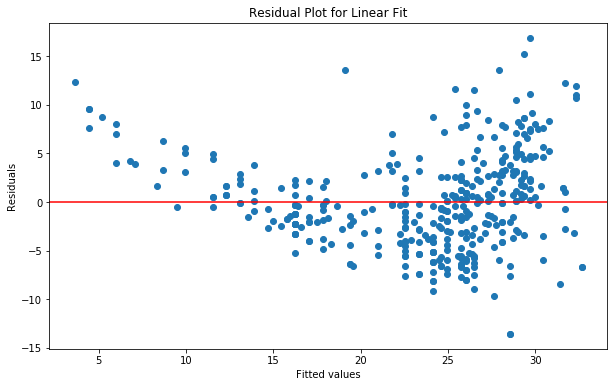

In [63]:
#c)
plt.figure(figsize=(10, 6))
sauto = plt.scatter(mpg_horsepower.fittedvalues, mpg_horsepower.resid);
sauto.axes.set(ylabel="Residuals", xlabel="Fitted values", title="Residual Plot for Linear Fit")
sauto.axes.axhline(color="red")

There is some evidence of non-linearity.

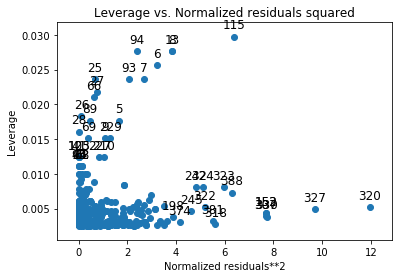

In [88]:
fig = sm.graphics.plot_leverage_resid2(mpg_horsepower)

#### 9.

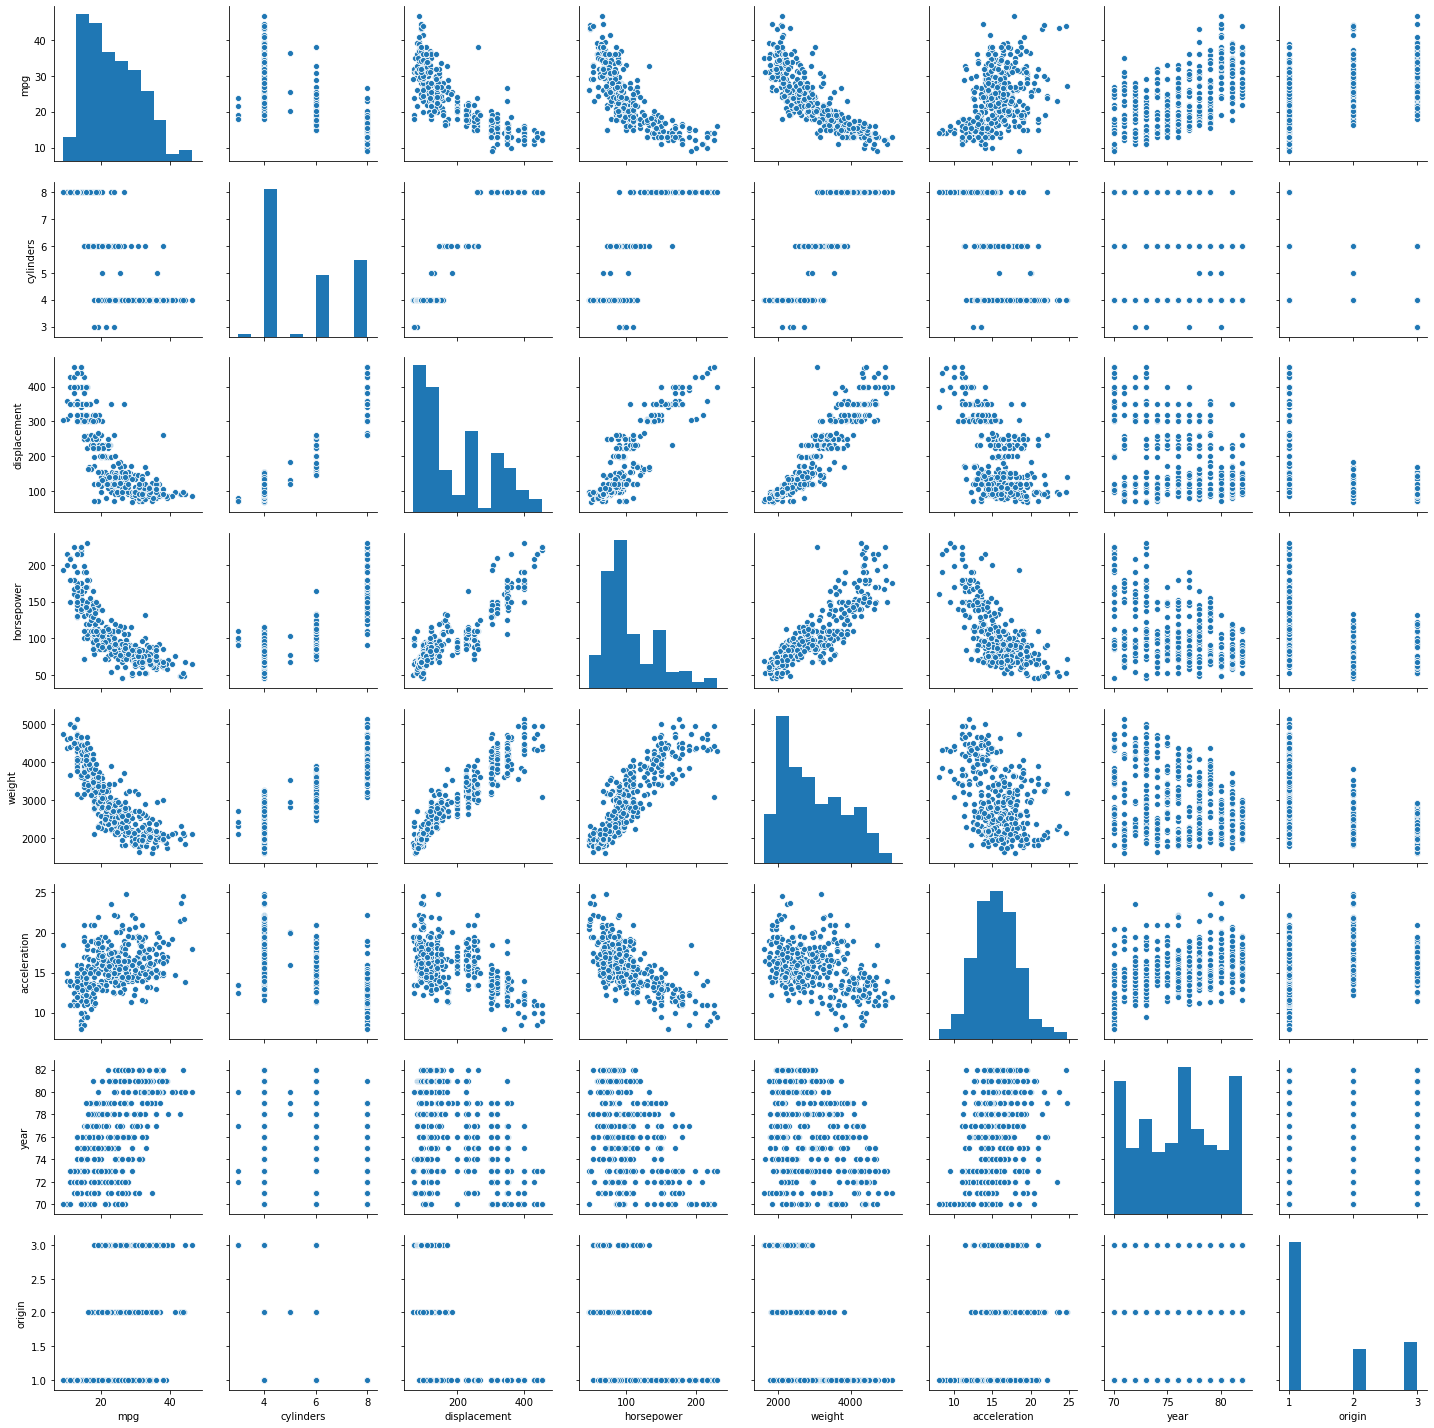

In [90]:
# a)
sns.pairplot(df_auto)

In [91]:
# b)
df_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [99]:
# c)
mul_lin_reg = "mpg ~ " + " + ".join(df_auto.columns[1:-1])
mul_lin_reg

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [100]:
auto_mlinear = smf.ols(mul_lin_reg, data=df_auto).fit()
auto_mlinear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          2.04e-139
Time:                        15:19:46   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i) Yes there is. We have a F value larger than 1 and a small p-value. <br>
ii) Looking at the p-values we see that displacement, weight, year and origin have a statistically significant relationship.<br>
iii) The coefficient of 0.7508 suggests that for a 1 year increase, the mph increases by 0.7508. 